In [224]:
import pandas as pD
import yfinance as yf


In [225]:
# Initilize ticker class to download price histor for symbol
Stock = yf.Ticker("TSLA")

In [226]:
Stock = Stock.history(period = "max")

In [227]:
Stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [228]:
Stock.index

DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3447, freq=None)

Cleaning and Visualizing Data

In [229]:
del Stock["Dividends"]
del Stock["Stock Splits"]

print(Stock.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


<Axes: xlabel='Date'>

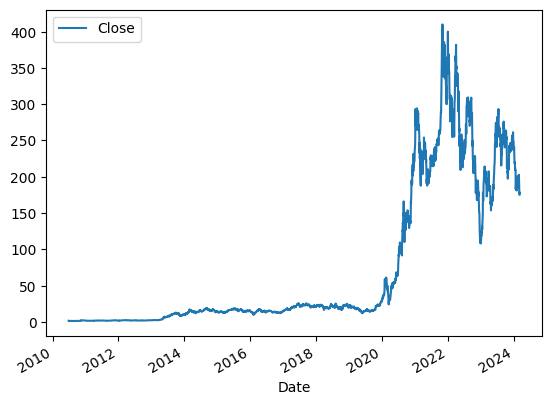

In [230]:
Stock.plot.line(y="Close", use_index = True)

In [231]:
# on days that the stock goes up, can we predict the stock increasing?
# Tomorrows price using shift, shifting all prices back one day
Stock["Tomorrow"] = Stock["Close"].shift(-1)

In [232]:
display(Stock.head())
display(Stock.tail())

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2024-03-04 00:00:00-05:00,198.729996,199.750000,186.720001,188.139999,134334900,180.740005
2024-03-05 00:00:00-05:00,183.050003,184.589996,177.570007,180.740005,119660800,176.539993
2024-03-06 00:00:00-05:00,179.990005,181.580002,173.699997,176.539993,107920900,178.649994
2024-03-07 00:00:00-05:00,174.350006,180.039993,173.699997,178.649994,102129000,175.339996
2024-03-08 00:00:00-05:00,181.500000,182.729996,174.699997,175.339996,85118590,NaN


In [233]:
# Set up Target to try and predict the stock. "is tomorows price greater than todays"
Stock["Target"] = (Stock["Tomorrow"] > Stock["Close"].astype(int))

In [234]:
display(Stock.head())
display(Stock.tail())

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,True
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,True
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,True
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,True
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,True


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2024-03-04 00:00:00-05:00,198.729996,199.750000,186.720001,188.139999,134334900,180.740005,False
2024-03-05 00:00:00-05:00,183.050003,184.589996,177.570007,180.740005,119660800,176.539993,False
2024-03-06 00:00:00-05:00,179.990005,181.580002,173.699997,176.539993,107920900,178.649994,True
2024-03-07 00:00:00-05:00,174.350006,180.039993,173.699997,178.649994,102129000,175.339996,False
2024-03-08 00:00:00-05:00,181.500000,182.729996,174.699997,175.339996,85118590,NaN,False


In [235]:
# # only output the last 10 years of the stocks historical data
# Stock = Stock.loc["2014-01-01":].copy()

Machine Learning Model

In [236]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state = 1)

# split data set, all rows except for last 100 into training and remaining rows into test
train = Stock.iloc[:-100]
test = Stock.iloc[-100:]

# a list with all columns that predicts the target
predictors = ["Close", "Volume", "Open", "High", "Low"]
# training the model to preditct the target
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [237]:
from sklearn.metrics import precision_score
# Generate predictions
predct = model.predict(test[predictors])

In [238]:
import pandas as pd
# easier to read when using pandas series
predct = pd.Series(predct, index = test.index)

In [239]:
# calculate precision score using the actual target and predicted target
precision_score(test["Target"], predct)

0.5692307692307692

In [240]:
# plot predicitons
combined = pd.concat([test["Target"], predct], axis = 1)

<Axes: xlabel='Date'>

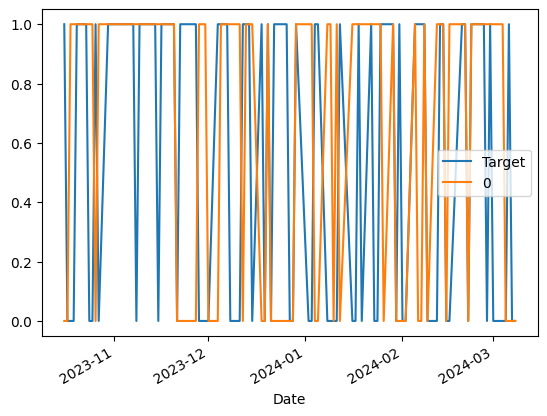

In [241]:
# combined.plot()
# Convert boolean values to numeric 0 and 1
test_numeric = test['Target'].astype(int)
predct_numeric = predct.astype(int)

# Plot predictions
combined_numeric = pd.concat([test_numeric, predct_numeric], axis=1)
combined_numeric.plot()

In [242]:
# Back Testing

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    predct = model.predict(test[predictors])
    preds = pd.Series(predct, index=test.index, name="Predictions")  
    combined = pd.concat([test["Target"], preds], axis=1)  
    return combined  # Added missing return statement

In [243]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [244]:
predictions = backtest(Stock, model, predictors)

In [246]:
predictions["Predictions"].value_counts()

Predictions
False    521
True     426
Name: count, dtype: int64

In [248]:
precision_score(predictions["Target"], predictions["Predictions"] )

0.5375586854460094

In [250]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
True     0.55755
False    0.44245
Name: count, dtype: float64